# Raw Data

- Target:
  - Compensation: https://ec.europa.eu/eurostat/tgm/graph.do?tab=graph&plugin=1&pcode=tesem160&language=en&toolbox=sort
- Features:
  - Education: https://ec.europa.eu/eurostat/web/products-datasets/-/trng_lfs_02
  - Population: https://ec.europa.eu/eurostat/web/products-datasets/-/tps00001
  - R&D expenditure: https://ec.europa.eu/eurostat/web/products-datasets/-/t2020_20
  - Fertility rates by age: https://ec.europa.eu/eurostat/web/products-datasets/-/demo_frate
  - Human resources in science and technology (HRST): https://ec.europa.eu/eurostat/web/products-datasets/-/tsc00025
  - Tax rate: https://ec.europa.eu/eurostat/web/products-datasets/-/earn_nt_taxrate
  - ~~Gross domestic product: https://ec.europa.eu/eurostat/web/products-datasets/-/teina011~~
  - ~~Funding of education: https://ec.europa.eu/eurostat/web/products-datasets/-/educ_fifunds~~

## Compensation

- The zip file contains 25 tables
- It contains many empty tables and duplicates
- I used the tables below
  - nama_10_lp_ulc_1_Data.csv: Compensation of employees per hour worked (Euro)
  - nama_10_lp_ulc_2_Data.csv: Compensation per employee (Euro)
  - nama_10_lp_ulc_10_Data.csv: Real labour productivity per person (Index, 2015=100)
- Compensation per hour worked and compensation per employee are highly correlated (0.99)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale

In [2]:
data_raw_dir = '../data/raw'

def atof(value):
    if value == ':':
        return None
    return locale.atof(value.replace(',', ''))

def nantonone(flag):
    if flag == 'nan':
        return None
    return flag

def truncate(geo, limit=20):
    return (geo[:limit] + '..') if len(geo) > limit else geo

geos_to_exclude = [
    'European Union - 27 countries (from 2020)',
    'European Union - 28 countries (2013-2020)',
    'European Union - 15 countries (1995-2004)',
    'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)',
    'Euro area - 19 countries  (from 2015)',
    'Euro area - 12 countries (2001-2006)',
    'Montenegro',
    'North  Macedonia',
    'Serbia']

country_name_dict = {
    'Germany (until 1990 former territory of the FRG)': 'Germany'
}
    
def normalize_country_name(name):
    if name in country_name_dict:
        return country_name_dict[name]
    else:
        return name

dfs = []
overview = []
for i in range(1,26):
    filename = f'nama_10_lp_ulc_{i}_Data.csv'
    df = pd.read_csv(f'{data_raw_dir}/{filename}')
    df = df[~df['GEO'].isin(geos_to_exclude)]
    df['TIME'] = df['TIME'].astype(int)
    df['GEO'] = df['GEO'].apply(normalize_country_name)
    df['Value'] = df['Value'].apply(atof)
    df['Flag and Footnotes'] = df['Flag and Footnotes'].apply(nantonone)
    dfs.append(df)
    
    na_item = ''.join(df['NA_ITEM'].unique())
    unit = ''.join(df['UNIT'].unique())
    value_null_rate = df['Value'].isna().mean().round(4) * 100
    flag_null_rate = df['Flag and Footnotes'].isna().mean().round(4) * 100
    overview.append({
        'filename': filename,
        'NA_ITEM': na_item,
        'UNIT': unit,
        'value_null_rate': value_null_rate,
        'flag_null_rate': flag_null_rate,
    })
overview_df = pd.DataFrame(overview)
display(overview_df)
display(overview_df['NA_ITEM'].unique().tolist())

,filename,NA_ITEM,UNIT,value_null_rate,flag_null_rate
0,nama_10_lp_ulc_1_Data.csv,Compensation of employees per hour worked,Euro,4.38,82.50
1,nama_10_lp_ulc_2_Data.csv,Compensation per employee,Euro,1.56,82.50
2,nama_10_lp_ulc_3_Data.csv,Nominal labour productivity per hour worked,Euro,100.00,100.00
3,nama_10_lp_ulc_4_Data.csv,Nominal labour productivity per person,Euro,100.00,100.00
4,nama_10_lp_ulc_5_Data.csv,Real labour productivity per person,Euro,100.00,100.00
5,nama_10_lp_ulc_6_Data.csv,Compensation of employees per hour worked,"Index, 2010=100",100.00,100.00
6,nama_10_lp_ulc_7_Data.csv,Compensation per employee,"Index, 2010=100",100.00,100.00
7,nama_10_lp_ulc_8_Data.csv,Nominal labour productivity per hour worked,"Index, 2010=100",100.00,100.00
8,nama_10_lp_ulc_9_Data.csv,Nominal labour productivity per person,"Index, 2010=100",100.00,100.00
9,nama_10_lp_ulc_10_Data.csv,Real labour productivity per person,"Index, 2010=100",1.25,79.06


['Compensation of employees per hour worked',
 'Compensation per employee',
 'Nominal labour productivity per hour worked',
 'Nominal labour productivity per person',
 'Real labour productivity per person']

In [3]:
compensation_per_hour_df = dfs[0]
compensation_per_hour_df.rename(columns={'Value': 'Compensation of employees per hour worked (Euro)'}, inplace=True)

compensation_per_employee_df = dfs[1]
compensation_per_employee_df.rename(columns={'Value': 'Compensation per employee (Euro)'}, inplace=True)

productivity_per_person_df = dfs[9]
productivity_per_person_df.rename(columns={'Value': 'Real labour productivity per person (Index, 2015=100)'}, inplace=True)

In [4]:
df = compensation_per_hour_df[['TIME', 'GEO', 'Compensation of employees per hour worked (Euro)']]
df_to_merge = compensation_per_employee_df[['TIME', 'GEO', 'Compensation per employee (Euro)']]

df = df.merge(df_to_merge, on=['TIME', 'GEO'])
df_to_merge = productivity_per_person_df[['TIME', 'GEO', 'Real labour productivity per person (Index, 2015=100)']]

productivity_df = df.merge(df_to_merge, on=['TIME', 'GEO'])
productivity_df.head()

,TIME,GEO,Compensation of employees per hour worked (Euro),Compensation per employee (Euro),"Real labour productivity per person (Index, 2015=100)"
0,2010,Belgium,34.3,49054.8,100.0
1,2011,Belgium,35.1,50593.5,100.4
2,2012,Belgium,36.2,52178.2,100.7
3,2013,Belgium,37.2,53452.5,101.4
4,2014,Belgium,37.6,53965.2,102.6


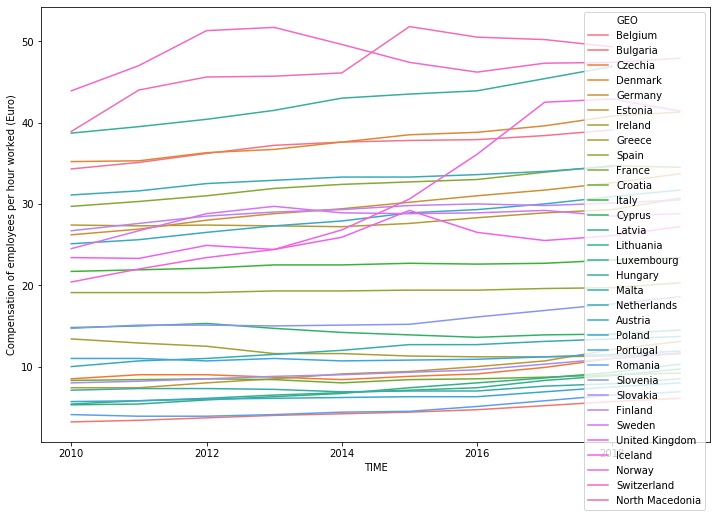

In [5]:
plt.figure(figsize=(12,8))
sns.lineplot(data=productivity_df, x='TIME', y='Compensation of employees per hour worked (Euro)', hue='GEO')
plt.show()

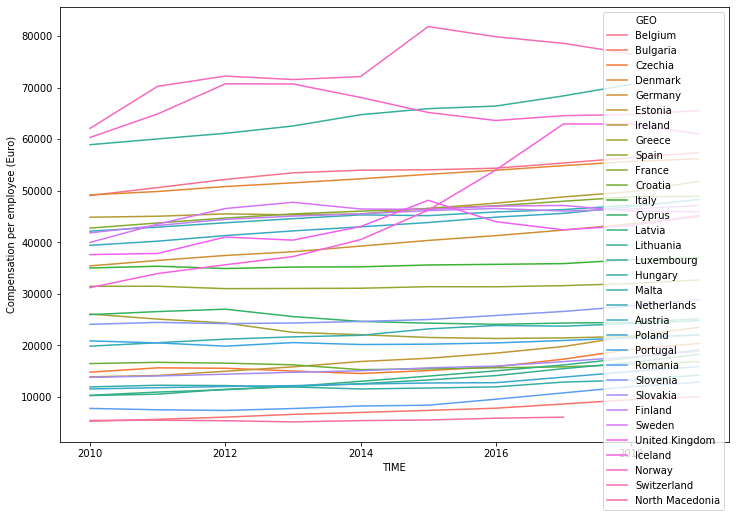

In [6]:
plt.figure(figsize=(12,8))
sns.lineplot(data=productivity_df, x='TIME', y='Compensation per employee (Euro)', hue='GEO')
plt.show()

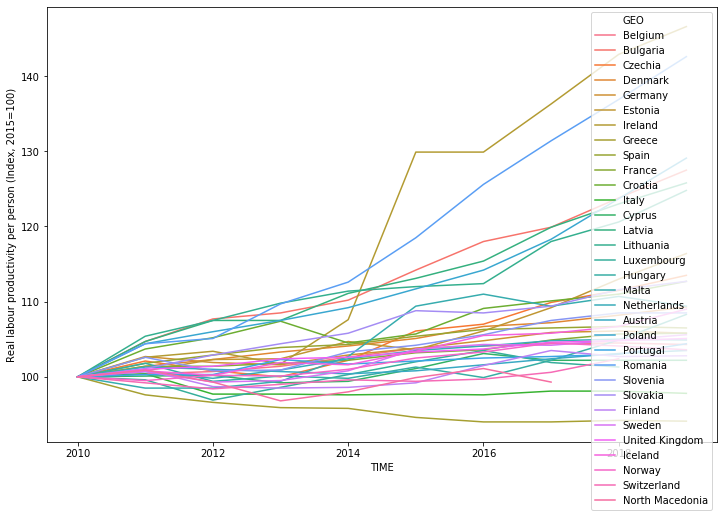

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(data=productivity_df, x='TIME', y='Real labour productivity per person (Index, 2015=100)', hue='GEO')
plt.show()

In [8]:
column = 'Compensation of employees per hour worked (Euro)'
temp = productivity_df[~productivity_df[column].isnull()]
times = sorted(temp['TIME'].unique())
start, end = times[0], times[-1]
agg_first = temp.groupby(by=['GEO']).first().reset_index()
agg_last = temp.groupby(by=['GEO']).last().reset_index()
productivity_agg = agg_first.merge(agg_last, on=['GEO'], suffixes=('_start', '_last'))
productivity_agg['diff'] = productivity_agg.apply(lambda row: row[f'{column}_last'] - row[f'{column}_start'],axis=1)
productivity_agg['productivity_rank'] = productivity_agg['diff'].rank(ascending=False).astype(int)
sorted_agg = productivity_agg.sort_values(by='diff', ascending=False)
display(sorted_agg.head(5))
display(sorted_agg.tail(5))

,GEO,TIME_start,Compensation of employees per hour worked (Euro)_start,Compensation per employee (Euro)_start,"Real labour productivity per person (Index, 2015=100)_start",TIME_last,Compensation of employees per hour worked (Euro)_last,Compensation per employee (Euro)_last,"Real labour productivity per person (Index, 2015=100)_last",diff,productivity_rank
13,Iceland,2010,20.4,31185.9,100.0,2019,41.4,60998.9,109.0,21.0,1
29,Switzerland,2010,38.9,62068.8,100.0,2018,49.3,76494.7,102.4,10.4,2
18,Luxembourg,2010,38.7,58910.9,100.0,2018,46.9,70617.9,101.3,8.2,3
10,Germany,2010,26.2,35409.2,100.0,2019,33.7,44963.9,105.8,7.5,4
0,Austria,2010,25.1,39392.8,100.0,2019,31.7,48275.2,103.5,6.6,5


,GEO,TIME_start,Compensation of employees per hour worked (Euro)_start,Compensation per employee (Euro)_start,"Real labour productivity per person (Index, 2015=100)_start",TIME_last,Compensation of employees per hour worked (Euro)_last,Compensation per employee (Euro)_last,"Real labour productivity per person (Index, 2015=100)_last",diff,productivity_rank
27,Spain,2010,19.1,31449.5,100.0,2019,20.3,32680.2,106.5,1.2,27
23,Portugal,2010,11.0,20863.9,100.0,2019,11.9,22017.0,104.4,0.9,28
3,Croatia,2010,8.3,16462.0,100.0,2019,9.2,16828.1,112.7,0.9,29
4,Cyprus,2010,14.8,25954.5,100.0,2019,14.5,25148.8,102.2,-0.3,30
11,Greece,2010,13.4,26073.1,100.0,2019,11.6,21971.6,94.1,-1.8,31


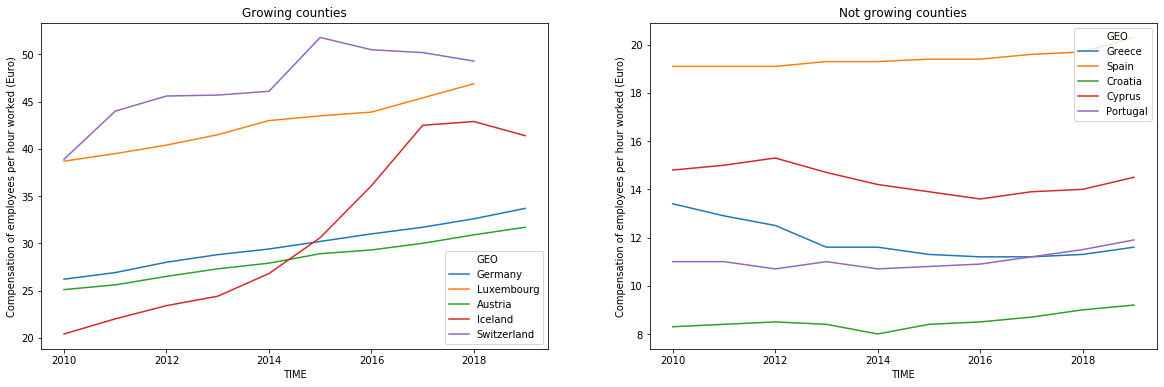

In [9]:
countries_sorted_by_productivity = productivity_agg.sort_values(by='diff', ascending=False)['GEO']

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(data=df[df['GEO'].isin(countries_sorted_by_productivity[:5])], x='TIME', y=column, hue='GEO', ax=axes[0])
axes[0].set_title('Growing counties')
sns.lineplot(data=df[df['GEO'].isin(countries_sorted_by_productivity[-5:])], x='TIME', y=column, hue='GEO', ax=axes[1])
axes[1].set_title('Not growing counties')
plt.show()

In [10]:
column = 'Compensation of employees per hour worked (Euro)'
temp = productivity_df[~productivity_df[column].isnull()]
# productivity_agg = temp.groupby(by=['GEO']).last().reset_index()
productivity_agg = temp.groupby(['GEO'])[column].mean().reset_index()
productivity_agg['productivity_rank'] = productivity_agg[column].rank(ascending=False).astype(int)
sorted_agg = productivity_agg.sort_values(by=column, ascending=False)
display(sorted_agg.head(5))
display(sorted_agg.tail(5))

,GEO,Compensation of employees per hour worked (Euro),productivity_rank
21,Norway,47.970000,1
29,Switzerland,46.900000,2
18,Luxembourg,42.533333,3
6,Denmark,38.010000,4
1,Belgium,37.066667,5


,GEO,Compensation of employees per hour worked (Euro),productivity_rank
16,Latvia,7.32,27
17,Lithuania,7.20,28
22,Poland,6.48,29
24,Romania,4.92,30
2,Bulgaria,4.46,31


## Education

- **Hypothesis**: Educated people make more money
  - Education and productivity are correlated (0.34)

### Note

- Weak correlation: 0.1 - 0.3
- Moderate correlation: 0.3 - 0.5
- Strong correlation: 0.5 - 1.0

In [11]:
education_df = pd.read_csv(f'{data_raw_dir}/trng_lfs_02.tsv.gz', delimiter='\t')
education_df.head()

,"unit,isced11,sex,age,geo\time",2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,"PC,ED0-2,F,Y18-24,AT",61.5,64.6,63.8,61.6,60.7,60.2 b,69.8,68.3,66.9,67.0,64.9,62.5,59.5,58.8 b,60.7,59.3 b
1,"PC,ED0-2,F,Y18-24,BE",72.1,72.2,64.5 b,60.0,54.8,58.2 b,55.6,53.8,53.8,55.8,54.6,52.0 b,52.6,53.2 b,49.2,62.5 b
2,"PC,ED0-2,F,Y18-24,BG",50.8,48.6,48.1,45.3,46.1,48.8 b,49.0,47.5,52.4,51.6,50.5,50.6,54.2,47.7 b,42.1,45.1
3,"PC,ED0-2,F,Y18-24,CH",83.5,86.1,83.6,79.7,80.6,78.8 b,80.8,81.3,81.9,77.0 b,74.2,77.4,80.0,75.7,73.2,74.6
4,"PC,ED0-2,F,Y18-24,CY",31.1 u,44.3,40.2,50.1 u,61.1,57.9 bu,51.9,45.0,37.9,31.2,28.9 bu,25.0 u,41.7,26.3 bu,20.7 u,28.6


In [12]:
from iso3166 import countries
import re

country_code_dict = {
    'EL': 'GR',
    'UK': 'GB'
}

def country_code_to_name(code):
    if code in country_code_dict:
        code = country_code_dict[code]
    try:
        return countries.get(code).name
    except KeyError:
        return None
    
country_name_dict = {
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
}
    
def normalize_country_name(name):
    if name in country_name_dict:
        return country_name_dict[name]
    else:
        return name

flag_dict = {
    ':': 'not available',
    'p': 'provisional',
    'b': 'break in time series',
    'd': 'definition differs',
    'c': 'conditional',
    'e': 'estimated',
}

def extract_flags(p_str):
    flag = None
    for char in flag_dict:
        if char in p_str:
            flag = flag_dict[char]
            break
    return flag

def preprocess(df):
    # Rename
    columns_to_rename = {c: c.rstrip() for c in df.columns if c.endswith(' ')}
    raw_base_column = [c for c in df.columns if c.endswith('\\time')][0] # e.g. 'unit,isced11,sex,age,geo\\time'
    base_column = raw_base_column.replace('\\time', '')
    columns_to_rename[raw_base_column] = base_column
    df.rename(columns=columns_to_rename, inplace=True)
    
    # Unpivot
    df = df.melt(id_vars=base_column, var_name='year', value_name='value')
    
    # Split
    columns_to_split = base_column.split(',')
    df[columns_to_split] = df[base_column].str.split(',', expand=True)
    df.drop(columns=[base_column], inplace=True)
    
    # Normalize country name
    df.rename(columns={'geo': 'GEO'}, inplace=True)
    df['GEO'] = df['GEO'].apply(country_code_to_name)
    df['GEO'] = df['GEO'].apply(normalize_country_name)
    
    # Extract flags
    df['value'] = df['value'].astype(str)
    df['flags'] = df['value'].apply(lambda p_str: extract_flags(p_str))
    df['value'] = df['value'].apply(lambda p_str: re.sub('[^\d\.]', '', p_str))
    df['value'] = df['value'].replace('', None)
    
    # Convert data types
    df['year'] = df['year'].astype(int)
    df['value'] = pd.to_numeric(df['value'], errors='coerce')

    return df

In [13]:
education_df = preprocess(education_df)
education_df.head()

,year,value,unit,isced11,sex,age,GEO,flags
0,2019,61.5,PC,ED0-2,F,Y18-24,Austria,None
1,2019,72.1,PC,ED0-2,F,Y18-24,Belgium,None
2,2019,50.8,PC,ED0-2,F,Y18-24,Bulgaria,None
3,2019,83.5,PC,ED0-2,F,Y18-24,Switzerland,None
4,2019,31.1,PC,ED0-2,F,Y18-24,Cyprus,None


In [14]:
temp = education_df[education_df['age'] == 'Y18-24']
education_agg = temp.groupby(['GEO','year'])['value'].mean().reset_index()
education_agg = education_agg.groupby(['GEO'])['value'].mean().reset_index()
education_agg['education_rank'] = education_agg['value'].rank(ascending=False).astype(int)
education_agg.head()

,GEO,value,education_rank
0,Austria,55.738542,14
1,Belgium,49.356696,26
2,Bulgaria,46.949479,28
3,Croatia,54.651250,17
4,Cyprus,39.348958,33


In [15]:
merged_df = productivity_agg[['GEO', 'productivity_rank']].merge(education_agg[['GEO', 'education_rank']], on='GEO')
merged_df.sort_values(by='productivity_rank')

,GEO,productivity_rank,education_rank
21,Norway,1,7
29,Switzerland,2,19
18,Luxembourg,3,3
6,Denmark,4,2
1,Belgium,5,26
20,Netherlands,6,4
9,France,7,15
13,Iceland,8,18
10,Germany,9,11
8,Finland,10,9


In [16]:
merged_df.corr()

,productivity_rank,education_rank
productivity_rank,1.000000,0.321945
education_rank,0.321945,1.000000


In [17]:
productivity_df

,TIME,GEO,Compensation of employees per hour worked (Euro),Compensation per employee (Euro),"Real labour productivity per person (Index, 2015=100)"
0,2010,Belgium,34.3,49054.8,100.0
1,2011,Belgium,35.1,50593.5,100.4
2,2012,Belgium,36.2,52178.2,100.7
3,2013,Belgium,37.2,53452.5,101.4
4,2014,Belgium,37.6,53965.2,102.6
...,...,...,...,...,...
315,2015,North Macedonia,NaN,5520.4,99.9
316,2016,North Macedonia,NaN,5872.8,101.1
317,2017,North Macedonia,NaN,6074.1,99.3
318,2018,North Macedonia,NaN,NaN,NaN


## Population

In [18]:
population_df = pd.read_csv(f'{data_raw_dir}/tps00001.tsv.gz', delimiter='\t')
population_df.head()

,"indic_de,geo\time",2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"JAN,AD",83137,84484,84082,78115 b,78115,76246,:,:,71732,:,74794 e,76177
1,"JAN,AL",2958266,2936355,2918674,2907361,2903008,2897770,2892394,2885796,2875592,2876591,2870324,2862427
2,"JAN,AM",3230086,3237976,3249482,3262650,3274285,3026878,:,3010598,2998577,2986151,2972732,2965269
3,"JAN,AT",8307989,8335003,8351643,8375164,8408121,8451860,8507786,8584926,8700471,8772865,8822267,8858775
4,"JAN,AZ",8629900,8896900,8997586,9111078,9235085,9356483,9477119,9593038,9705643,9809981,9898085,9981457


In [19]:
population_df = preprocess(population_df)
population_df.head()

,year,value,indic_de,GEO,flags
0,2008,83137,JAN,Andorra,None
1,2008,2958266,JAN,Albania,None
2,2008,3230086,JAN,Armenia,None
3,2008,8307989,JAN,Austria,None
4,2008,8629900,JAN,Azerbaijan,None


In [20]:
population_df['indic_de'].unique()

array(['JAN'], dtype=object)

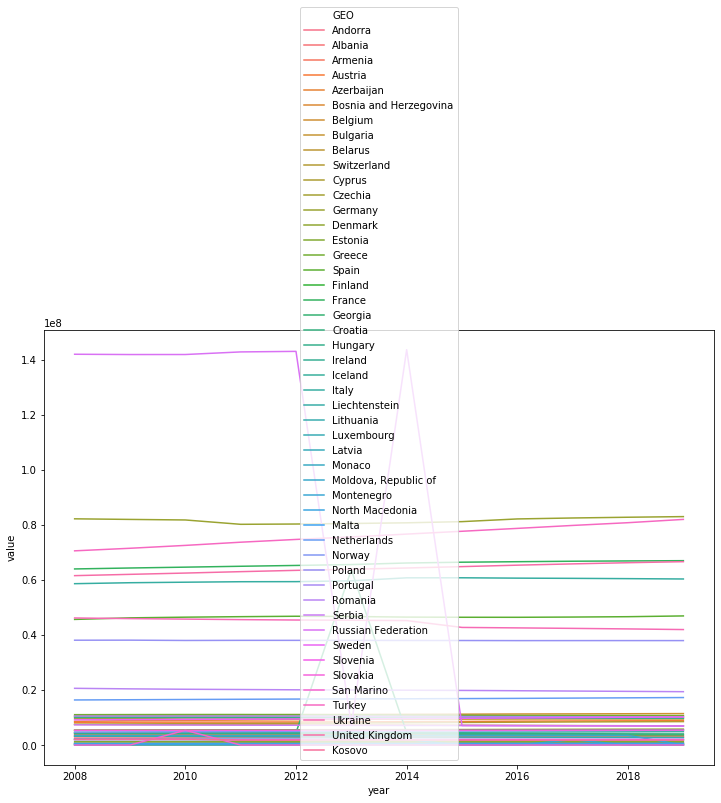

In [21]:
plt.figure(figsize=(12,8))
sns.lineplot(data=population_df, x='year', y='value', hue='GEO')
plt.show()

## R&D expenditure

In [22]:
rd_df = pd.read_csv(f'{data_raw_dir}/t2020_20.tsv.gz', delimiter='\t')
rd_df.drop(columns=['TARGET '], inplace=True)
rd_df.head()

,"unit,indic_eu,geo\time",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"PC_GDP,T2020_20,AT",:,:,:,:,:,1.53 e,1.58 e,1.66 e,1.73,...,2.6,2.73 e,2.67,2.91 e,2.95,3.08 e,3.05,3.12,3.05,3.17 p
1,"PC_GDP,T2020_20,BA",:,:,:,:,:,:,:,:,:,...,:,:,:,0.27,0.32,0.26,:,:,:,:
2,"PC_GDP,T2020_20,BE",:,:,:,:,:,1.65,1.74,1.81,1.84,...,2,2.06,2.17,2.28,2.33,2.37,2.43,2.52,2.66,2.76 p
3,"PC_GDP,T2020_20,BG",:,:,:,:,:,0.43,0.42 b,0.47,0.48,...,0.49,0.57,0.53,0.6,0.64,0.79,0.95,0.77,0.74,0.76
4,"PC_GDP,T2020_20,CH",:,:,2.38,:,:,:,2.45,:,:,...,:,:,:,3.19,:,:,3.37,:,3.29,:


In [23]:
rd_df = preprocess(rd_df)
rd_df.head()

,year,value,unit,indic_eu,GEO,flags
0,1990,NaN,PC_GDP,T2020_20,Austria,not available
1,1990,NaN,PC_GDP,T2020_20,Bosnia and Herzegovina,not available
2,1990,NaN,PC_GDP,T2020_20,Belgium,not available
3,1990,NaN,PC_GDP,T2020_20,Bulgaria,not available
4,1990,NaN,PC_GDP,T2020_20,Switzerland,not available


## Fertility Rates

In [24]:
frate_df = pd.read_csv(f'{data_raw_dir}/demo_frate.tsv.gz', delimiter='\t')
frate_df.head()

,"unit,age,agedef,geo\time",2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,"NR,TOTAL,COMPLET,AD",:,:,:,:,:,:,:,:,1.27491,...,:,:,:,:,:,:,:,:,:,:
1,"NR,TOTAL,COMPLET,AL",1.36807,1.47540,1.53794,1.59469,1.73440,1.72964,1.70506,1.64833,1.63118,...,:,:,:,:,:,:,:,:,:,:
2,"NR,TOTAL,COMPLET,AM",1.56746,1.56087,1.62480,1.62067,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
3,"NR,TOTAL,COMPLET,AT",1.47446,1.51755,1.52920,1.49020,1.46365,1.43547,1.43955,1.42994,1.44231,...,2.48572,2.58385,2.61916,2.65982,2.69995,2.79138,2.81888,2.79853,2.78429,2.69258
4,"NR,TOTAL,COMPLET,AZ",1.73095,1.75000,1.89964,1.94264,1.96592,1.97578,1.99712,:,1.92400,...,:,:,:,:,:,:,:,:,:,:


In [25]:
frate_df = preprocess(frate_df)
frate_df.head()

,year,value,unit,age,agedef,GEO,flags
0,2018,NaN,NR,TOTAL,COMPLET,Andorra,not available
1,2018,1.36807,NR,TOTAL,COMPLET,Albania,None
2,2018,1.56746,NR,TOTAL,COMPLET,Armenia,None
3,2018,1.47446,NR,TOTAL,COMPLET,Austria,None
4,2018,1.73095,NR,TOTAL,COMPLET,Azerbaijan,None


## Funding of education

In [26]:
education_funding_df = pd.read_csv(f'{data_raw_dir}/educ_fifunds.tsv.gz', delimiter='\t')
education_funding_df.head()

,"indic_ed,unit,geo\time",2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
0,"FS01_1,PC,AL",:,:,:,:,:,:,:,:,:,: u,:,:,:,:,:,:,:
1,"FS01_1,PC,AT",73.3,74.0,73.5,74.1,75.0,74.7,75.2,73.5,74.1,71.6,72.7,71.6,72.0,71.5,:,:,:
2,"FS01_1,PC,BE",23.1 d,22.2 d,22.2 d,20.7 d,19.8 d,18.3 d,18.0 d,17.8 d,17.6 d,18.5 d,16.7 d,4.2 d,3.8 d,:,:,:,:
3,"FS01_1,PC,BE_FRA",:,:,:,:,:,:,: u,: u,: u,: u,: u,:,:,:,:,:,:
4,"FS01_1,PC,BE_VLA",:,:,:,:,:,:,: u,: u,: u,:,:,:,:,:,:,:,:


In [27]:
education_funding_df = preprocess(education_funding_df)
education_funding_df.head()

,year,value,indic_ed,unit,GEO,flags
0,2011,NaN,FS01_1,PC,Albania,not available
1,2011,73.3,FS01_1,PC,Austria,None
2,2011,23.1,FS01_1,PC,Belgium,definition differs
3,2011,23.1,FS01_1,PC,None,not available
4,2011,23.1,FS01_1,PC,None,not available


## Human resources in science and technology (HRST)

In [28]:
hrst_df = pd.read_csv(f'{data_raw_dir}/tsc00025.tsv.gz', delimiter='\t')
hrst_df.head()

,"unit,category,age,sex,geo\time",2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"PC_ACT,HRST,Y25-64,F,AT",35.8,37.4,37.6,38.4 b,40.0,42.5,49.0 b,48.6,49.7,51.2,51.2,52.3
1,"PC_ACT,HRST,Y25-64,F,BE",50.1 b,51.8,53.5,52.8 b,54.1,53.9,55.3 b,54.9,56.1,59.2 b,59.3,59.7
2,"PC_ACT,HRST,Y25-64,F,BG",37.8 b,38.6,39.8 b,40.0 b,40.0,41.6,43.3 b,44.5,45.2,44.4,44.7,44.2
3,"PC_ACT,HRST,Y25-64,F,CH",49.9,50.8,49.3 b,47.3 b,48.3,50.5,51.6 b,52.9,53.9,55.5,57.1,58.1
4,"PC_ACT,HRST,Y25-64,F,CY",47.3,46.3 b,46.7,50.9 b,51.2,50.9,52.9 b,53.1,55.4,56.0,56.9,58.8


In [29]:
hrst_df = preprocess(hrst_df)
hrst_df.head()

,year,value,unit,category,age,sex,GEO,flags
0,2008,35.8,PC_ACT,HRST,Y25-64,F,Austria,None
1,2008,50.1,PC_ACT,HRST,Y25-64,F,Belgium,break in time series
2,2008,37.8,PC_ACT,HRST,Y25-64,F,Bulgaria,break in time series
3,2008,49.9,PC_ACT,HRST,Y25-64,F,Switzerland,None
4,2008,47.3,PC_ACT,HRST,Y25-64,F,Cyprus,None


## Gross domestic product

In [30]:
gdp_df = pd.read_csv(f'{data_raw_dir}/teina011.tsv.gz', delimiter='\t')
gdp_df.head()

,"na_item,unit,geo\time",2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,"B1GQ,PCH_Q1_SCA,AT",0.4,0.8,0.8,0.5,0.8,0.3,0.3,0.8,0.5,0.1,0.2,0.2
1,"B1GQ,PCH_Q1_SCA,BE",0.8,0.3,0.1,0.8,0.2,0.3,0.2,0.8,0.0,0.3,0.4,0.4
2,"B1GQ,PCH_Q1_SCA,BG",0.8,0.8,0.8,0.7,0.6,0.9,1.0,0.8,1.0 p,0.7 p,0.7 p,0.8 p
3,"B1GQ,PCH_Q1_SCA,CH",0.1,0.7,0.7,1.0,1.0,0.8,-0.4,-0.1,0.4,0.4,0.4,0.3
4,"B1GQ,PCH_Q1_SCA,CY",0.7,0.8,0.7,1.1,1.8,0.6,0.3,1.0,1.4,0.4,0.5,0.8
